Titanic suvival prediction using decesion tree

In [118]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
# Read the train and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [63]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train_df.isnull().head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False


# Exploratory Data Analysis

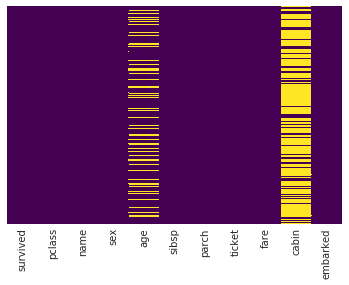

In [65]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

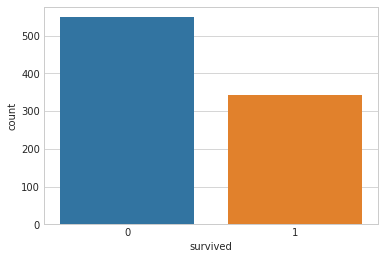

In [66]:
sns.set_style('whitegrid')

sns.countplot(x='survived',data=train_df)

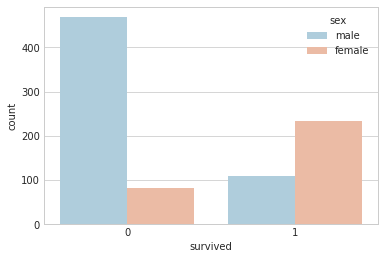

In [67]:

sns.countplot(x='survived',data=train_df,hue='sex',palette='RdBu_r')

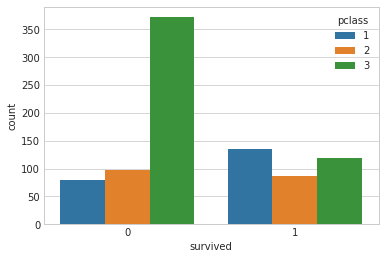

In [68]:
sns.countplot(x='survived',data=train_df,hue='pclass')

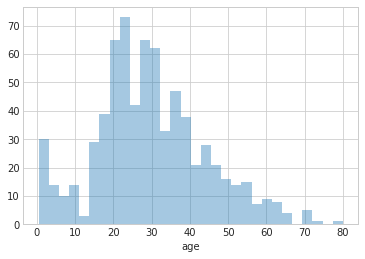

In [69]:
sns.distplot(train_df['age'].dropna(),bins=30,kde=False)

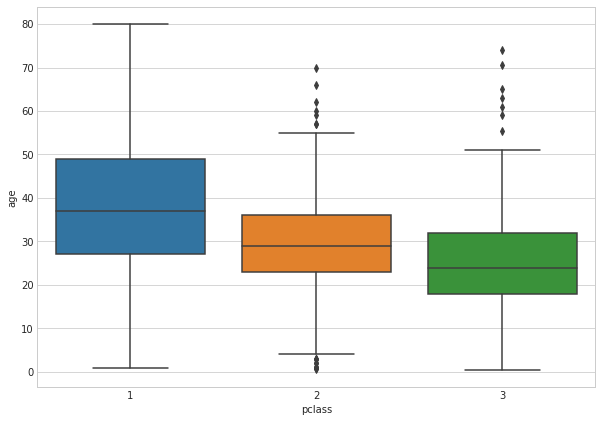

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass',y='age',data=train_df)

In [71]:
# Fill the missing value in "Age".
train_df["age"] = train_df["age"].fillna(train_df["age"].median())
test_df["age"] = test_df["age"].fillna(test_df["age"].median())




#Cleaning train data

# "Sex" Coulumn has male/feamle as value. We can use LabelEncoder
# to convert these to int. male:1,female:0
lb = LabelEncoder()
train_df['sex'] = lb.fit_transform(train_df['sex']) 
test_df['sex'] = lb.fit_transform(test_df['sex']) 



# Converting the Embarked Column
train_df["embarked"] = train_df["embarked"].fillna("S")
train_df.loc[train_df["embarked"] == "S", "embarked"] = 0
train_df.loc[train_df["embarked"] == "C", "embarked"] = 1
train_df.loc[train_df["embarked"] == "Q", "embarked"] = 2

test_df["embarked"] = test_df["embarked"].fillna("S")
test_df.loc[test_df["embarked"] == "S", "embarked"] = 0
test_df.loc[test_df["embarked"] == "C", "embarked"] = 1
test_df.loc[test_df["embarked"] == "Q", "embarked"] = 2

In [72]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


You use only Pclass, Sex, Age, Sibsp (Siblings aboard), Parch (Parents/children aboard), 
and Fare to predict whether a passenger survived. 

In [73]:
#Dropping unwanted columns. Also, removing the target column.
survived_train = train_df['survived']
train_df = train_df.drop(['name', 'ticket', 'cabin', 'survived'], axis=1)
train_df.head()



,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [74]:
# survived_test = test_df['survived']
test_df = test_df.drop(['name', 'ticket', 'cabin'], axis=1)
test_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [75]:
# Let's get the total number of missing values in both datasets.
print("*****In the train set*****")
print(train_df.isna().sum())
print("\n")
print("*****In the test set*****")
print(test_df.isna().sum())

*****In the train set*****
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


*****In the test set*****
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64


In [76]:
#Imputer is used to fill all the occurances of NaN with mean of that column.
im = Imputer()
predictors = im.fit_transform(train_df)

In [81]:
train_df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

# Model based on individual feature

In [104]:
y = survived_train 

for data in train_df.columns:
    X = train_df[data].to_frame(name=data)
    logmodel = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    logmodel.fit(X_train,y_train)
    
    print ("Train score",data,logmodel.score(X_train,y_train))
    print ("Test score",data,logmodel.score(X_test,y_test))



Train score pclass 0.6853932584269663
Test score pclass 0.664179104477612
Train score sex 0.7961476725521669
Test score sex 0.7649253731343284
Train score age 0.6340288924558587
Test score age 0.5746268656716418
Train score sibsp 0.6340288924558587
Test score sibsp 0.5746268656716418
Train score parch 0.6260032102728732
Test score parch 0.5634328358208955
Train score fare 0.6741573033707865
Test score fare 0.6455223880597015
Train score embarked 0.6147672552166934
Test score embarked 0.5559701492537313


Based on above score pclass and sex is most important feature in Model

In [105]:
logmodel = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=101)
logmodel.fit(X_train,y_train)

print ("Train score",data,logmodel.score(X_train,y_train))
print ("Test score",data,logmodel.score(X_test,y_test))

Train score embarked 0.8154093097913323
Test score embarked 0.7798507462686567


Using Cross validation

In [121]:
logmodel = LogisticRegression()
scores = cross_validation.cross_val_score(logmodel, train_df, y, cv=5)

In [122]:
scores

array([0.79329609, 0.81564246, 0.78089888, 0.76404494, 0.81920904])

In [123]:
print(scores.mean())

0.7946182814517551
